# Crime Analysis using Machine Learning EDA - Exploratory Data Analysis

## Reading CSV File

**.info()** is providing information if there is non-null values, the column information, and the datat type for the dataframe that will hold **KCPD_5_Year_Analysis.csv** file.

In [34]:
import pandas as pd
csv_file_path = 'Data/Data_Sets/KCPD_5_Year_Analysis.csv'
df = pd.read_csv(csv_file_path)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445336 entries, 0 to 445335
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Report_No                        445336 non-null  object 
 1   Reported_Date                    445336 non-null  object 
 2   Reported_Time                    445336 non-null  object 
 3   Year                             445336 non-null  int64  
 4   Quarter                          445336 non-null  int64  
 5   Month                            445336 non-null  object 
 6   Day_of_Week                      445336 non-null  object 
 7   From_Date                        445336 non-null  object 
 8   From_Time                        445336 non-null  object 
 9   Adjusted_To_Date                 445336 non-null  object 
 10  Adjusted_To_Time                 445336 non-null  object 
 11  Offense                          445336 non-null  object 
 12  De

### Create New Feature - Duration
This field was created after the summary statistics due to the nature of the time data that would help predicted the time the crime offense began to the end time and the amount of time it may take for the crime to be fully reported and the exact time it starts. 

In [ ]:
# Define a function to parse dates and times and calculate duration
def calculate_duration(row):
    from_datetime = pd.to_datetime(f"{row['From_Date']} {row['From_Time']}")
    adjust_to_datetime = pd.to_datetime(f"{row['Adjusted_To_Date']} {row['Adjusted_To_Time']}")
    return (adjust_to_datetime - from_datetime).total_seconds() /60

# Apply the function to each row to calculate the duration
# and create a new 'Duration' column
df['Duration'] = df.apply(calculate_duration, axis=1)

## Summary Statistics and Distributions
**.head()** is looking at distributions and pulling the first **10 rows** signified by the *n* value within the .head(). 

**.describe()** is used to generate descriptive statistics of the DataFrame.

**.value_counts()** is being used to calculate the frequency of the categorical fields of general_offense_categorication, type_of_crime, UCR_offense_classification, and NIBRS offense group. 

In [35]:
print(df.head(n=10))
print(df.describe())

    Report_No Reported_Date Reported_Time  Year  Quarter  Month Day_of_Week  \
0  KC19020397       3/20/19      13:55:00  2019        1  March   Wednesday   
1  KC19025235        4/7/19      15:52:00  2019        2  April      Sunday   
2  KC19036511       5/17/19      20:27:00  2019        2    May    Thursday   
3  KC19024315        4/4/19      04:20:00  2019        2  April   Wednesday   
4  KC19035992       5/16/19      08:17:00  2019        2    May    Thursday   
5  KC19026991       4/13/19      18:42:00  2019        2  April    Saturday   
6  KC19024634        4/5/19      06:59:00  2019        2  April      Friday   
7  KC19024718        4/5/19      11:47:00  2019        2  April    Thursday   
8  KC19024962        4/6/19      09:53:00  2019        2  April    Saturday   
9  KC19020110       3/19/19      16:20:00  2019        1  March     Tuesday   

  From_Date From_Time Adjusted_To_Date  ... Zip_Code Area  Involvement Race  \
0   3/20/19  09:00:00          3/20/19  ...  64118.

### Value_Counts
**General Offense Categorization**

In [27]:
print('General Offense Categorization')
print(df['General _Offense_Categorization'].value_counts())

General Offense Categorization
Larceny-theft                           100032
Other Assaults                           73821
Aggravated Assault                       47327
Vandalism                                41715
Motor Vehicle Theft                      40002
All Other Offenses                       38127
Burglary/Breaking and Entering           24300
Robbery                                  16688
Fraud                                    13132
Drug Abuse Violations                     8422
Disorderly Conduct                        6119
Stolen Property Offenses                  5822
Driving Under the Influence               5790
Rape                                      4085
Weapons: Carrying, Possessing, etc.       3556
Counterfeiting / Forgery                  3297
Offenses Against Family and Children      2785
Murder and Nonnegligent Manslaughter      2123
Drug Equipment Violations                 2098
Embezzlement                              1571
Sex Offenses                 

**Type of Crime**

In [28]:
print('Type of Crime')
print(df['Type_of_Crime'].value_counts())

Type of Crime
Non-Violent Crime    373758
Violent Crime         71578
Name: Type_of_Crime, dtype: int64


**UCR Offense Classification**

In [29]:
print('UCR Offense Classification')
print(df['UCR_Offense_Classification'].value_counts())

UCR Offense Classification
Part I     235912
Part II    209377
Other          47
Name: UCR_Offense_Classification, dtype: int64


**NIBRS Categorization**

In [30]:
print('NIBRS Categorication')
print(df['NIBRS Offense Group'].value_counts())

NIBRS Categorication
Group A    392198
Group B     53091
Other          47
Name: NIBRS Offense Group, dtype: int64


## Data Quality Check

In [36]:
print(df.isnull().sum())

Report_No                               0
Reported_Date                           0
Reported_Time                           0
Year                                    0
Quarter                                 0
Month                                   0
Day_of_Week                             0
From_Date                               0
From_Time                               0
Adjusted_To_Date                        0
Adjusted_To_Time                        0
Offense                                 0
Description                         24119
General _Offense_Categorization         0
Type_of_Crime                           0
UCR_Offense_Classification              0
NIBRS                                   0
NIBRS Offense Group                     0
Beat                                 1505
Address                                 0
City                                    0
Zip_Code                            35532
Area                                 2096
Involvement                       

## Removal of Null Values & Irrelevant Data 

In [38]:
# Load Dataset
csv_file_path = 'Data/Data_Sets/KCPD_5_Year_Analysis.csv'
df = pd.read_csv(csv_file_path)
# Removal of irrelevant feature of Beat
removal_of_feature = 'Beat'
df = df.drop(removal_of_feature, axis=1)
# Removal of irrelevant values of 'Other'
KCPD_Analysis_df = df[df['UCR_Offense_Classification']!= 'Other']

# Save dataset changes into clean CSV
KCPD_Analysis_df.to_csv('KCPD_5_Year_Analysis_Cleaned.csv', index=False)


## Initial Visualization

#### General Offense Categorization Count

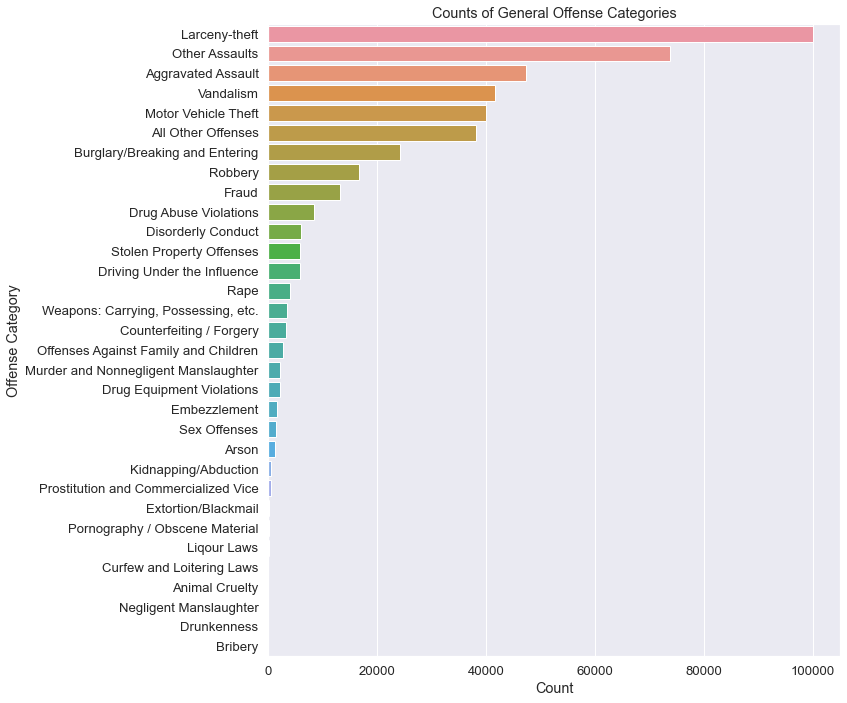

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure size
plt.figure(figsize=(12, 10))  # You can adjust these numbers as needed

# Setting font scale
sns.set(font_scale=1.2)  # Adjusts the size of the labels, title

# Creating Count Plot
sns.countplot(data=KCPD_Analysis_df, y='General _Offense_Categorization', order = KCPD_Analysis_df['General _Offense_Categorization'].value_counts().index)
plt.title('Counts of General Offense Categories')
plt.xlabel('Count')
plt.ylabel('Offense Category')

plt.tight_layout()

plt.show()

#### Distribution of Age

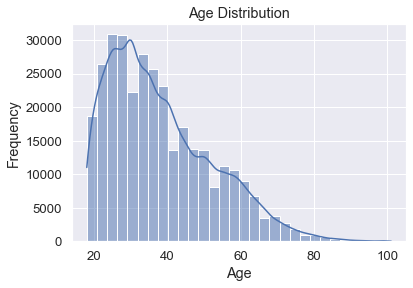

In [57]:
sns.histplot(data=KCPD_Analysis_df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

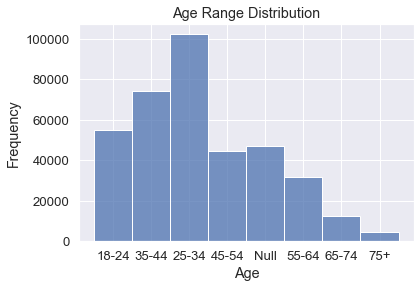

In [61]:
sns.histplot(data=KCPD_Analysis_df, x='Age_Range', bins=30)
plt.title('Age Range Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### UCR Offense Classification Proportions

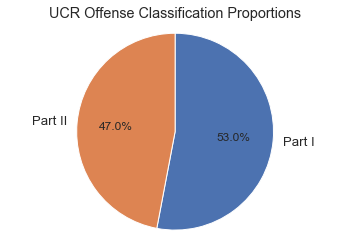

In [56]:
ucr_counts = KCPD_Analysis_df['UCR_Offense_Classification'].value_counts()
plt.pie(ucr_counts, labels=ucr_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title('UCR Offense Classification Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### NIBRS Offense Group Proportions

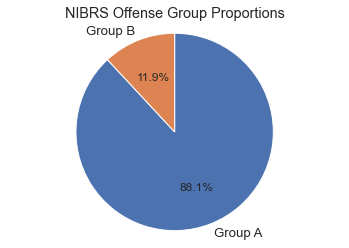

In [55]:
nibrs_counts = KCPD_Analysis_df['NIBRS Offense Group'].value_counts()
plt.pie(nibrs_counts, labels=nibrs_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title('NIBRS Offense Group Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Data Preprocessing - One-Hot Encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the Age_Range column
age_range_encoded = encoder.fit_transform(KCPD_Analysis_df[['Age_Range']])

# Create a DataFrame with the encoded features
age_range_encoded_df = pd.DataFrame(age_range_encoded, columns=encoder.get_feature_names_out(['Age_Range']))

# Concatenate the original DataFrame with the encoded DataFrame
KCPD_Analysis_df = pd.concat([KCPD_Analysis_df, age_range_encoded_df], axis=1)


In [64]:
KCPD_Analysis_df = KCPD_Analysis_df.drop('Age_Range',axis=1)